In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib

In [2]:
ensaio1 = pd.read_csv('AluminioAH1.csv', encoding = "ISO-8859-1")
ensaio2 = pd.read_csv('AluminioAH2.csv', encoding = "ISO-8859-1")

In [3]:
#área da seção transversal dos corpos de prova de alumínio (em mm^2):
area = 232.35219
#inserindo a coluna com o valor da tensão em MPa (pois a área está em mm^2)
ensaio1.insert(4,'Tensão',ensaio1["Force (N)"]/area) #tensão em MPa
ensaio2.insert(4,'Tensão',ensaio1["Force (N)"]/area) #tensão em MPa
#inserindo a coluna com o valor da deformação absoluta (sem ser percentual)
ensaio1.insert(5, 'Deformação absoluta', ensaio1['Strain (%)']/100)
ensaio2.insert(5, 'Deformação absoluta', ensaio1['Strain (%)']/100)

In [4]:
ensaio1.head()

,Position (mm),Force (N),Strain (%),Time (min),Tensão,Deformação absoluta
0,0.0000,0,0.00000,0.00272,0.000000,0.000000
1,0.0100,75,0.00167,0.00414,0.322786,0.000017
2,0.0210,278,0.00617,0.00866,1.196460,0.000062
3,0.0253,331,0.00733,0.01320,1.424562,0.000073
4,0.0300,370,0.00817,0.01770,1.592410,0.000082


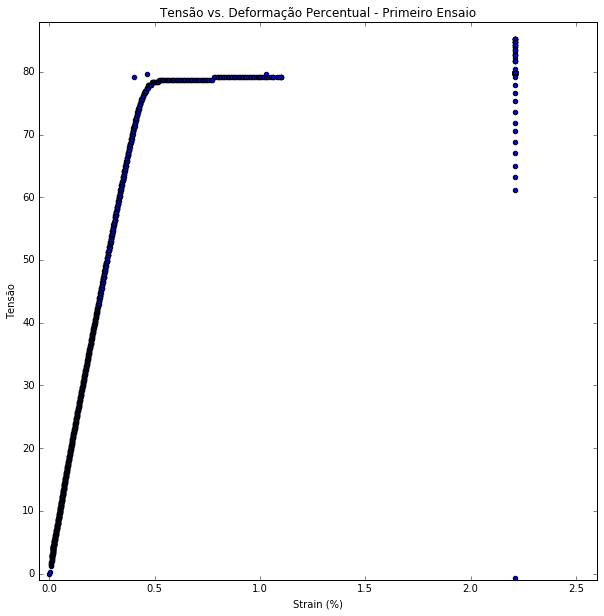

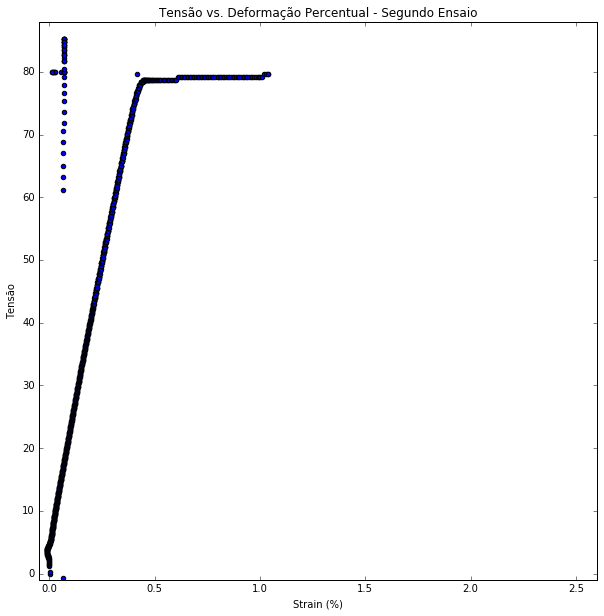

In [38]:
ensaio1.plot(kind='scatter', x='Strain (%)', y='Tensão', figsize=(10,10))
plt.axis([-0.05,2.6,-1,88])
plt.title('Tensão vs. Deformação Percentual - Primeiro Ensaio')

ensaio2.plot(kind='scatter', x='Strain (%)', y='Tensão', figsize=(10,10))
plt.axis([-0.05,2.6,-1,88])
plt.title('Tensão vs. Deformação Percentual - Segundo Ensaio')

1) Construir uma linha paralela à região elástica da curva, partindo de uma
deformação de 0,002 (ou 0,2%);


2) Definir o limite de escoamento (e) na intersecção da reta paralela traçada
com a curva tensão vs. deformação, conforme a Figura 5.
